<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [17]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

import shapefile as shp

plt.style.use('seaborn')
sns.set()

In [4]:
pd.options.display.max_columns = None

In [5]:
df_train_val = pd.read_csv('./DrivenData_PumpItUp_Competition/Training_set_values.csv',parse_dates=[2])

In [6]:
df_train_labels = pd.read_csv('./DrivenData_PumpItUp_Competition/Training_set_labels.csv')

In [7]:
df_train = pd.merge(df_train_labels,df_train_val,on='id')

In [6]:
df_test = pd.read_csv('./DrivenData_PumpItUp_Competition/Test_set_values.csv')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
status_group             59400 non-null object
amount_tsh               59400 non-null float64
date_recorded            59400 non-null datetime64[ns]
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null

In [8]:
df_test.shape

(14850, 40)

In [9]:
df_train.status_group.value_counts(normalize=True).round(4)*100

functional                 54.31
non functional             38.42
functional needs repair     7.27
Name: status_group, dtype: float64

In [10]:
df_train.status_group.value_counts(normalize=True)*100

functional                 54.308081
non functional             38.424242
functional needs repair     7.267677
Name: status_group, dtype: float64

In [22]:
def plot_distribution(dataset, cols=5, width=20, height=45, hspace=0.5, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            #g = sns.distplot(dataset[column],kde=False) # kde=False if problems, but then the distribution is missing
            g = sns.kdeplot(dataset[column],bw=1.5)
            plt.xticks(rotation=25)

In [23]:
df_temp= df_train.copy()

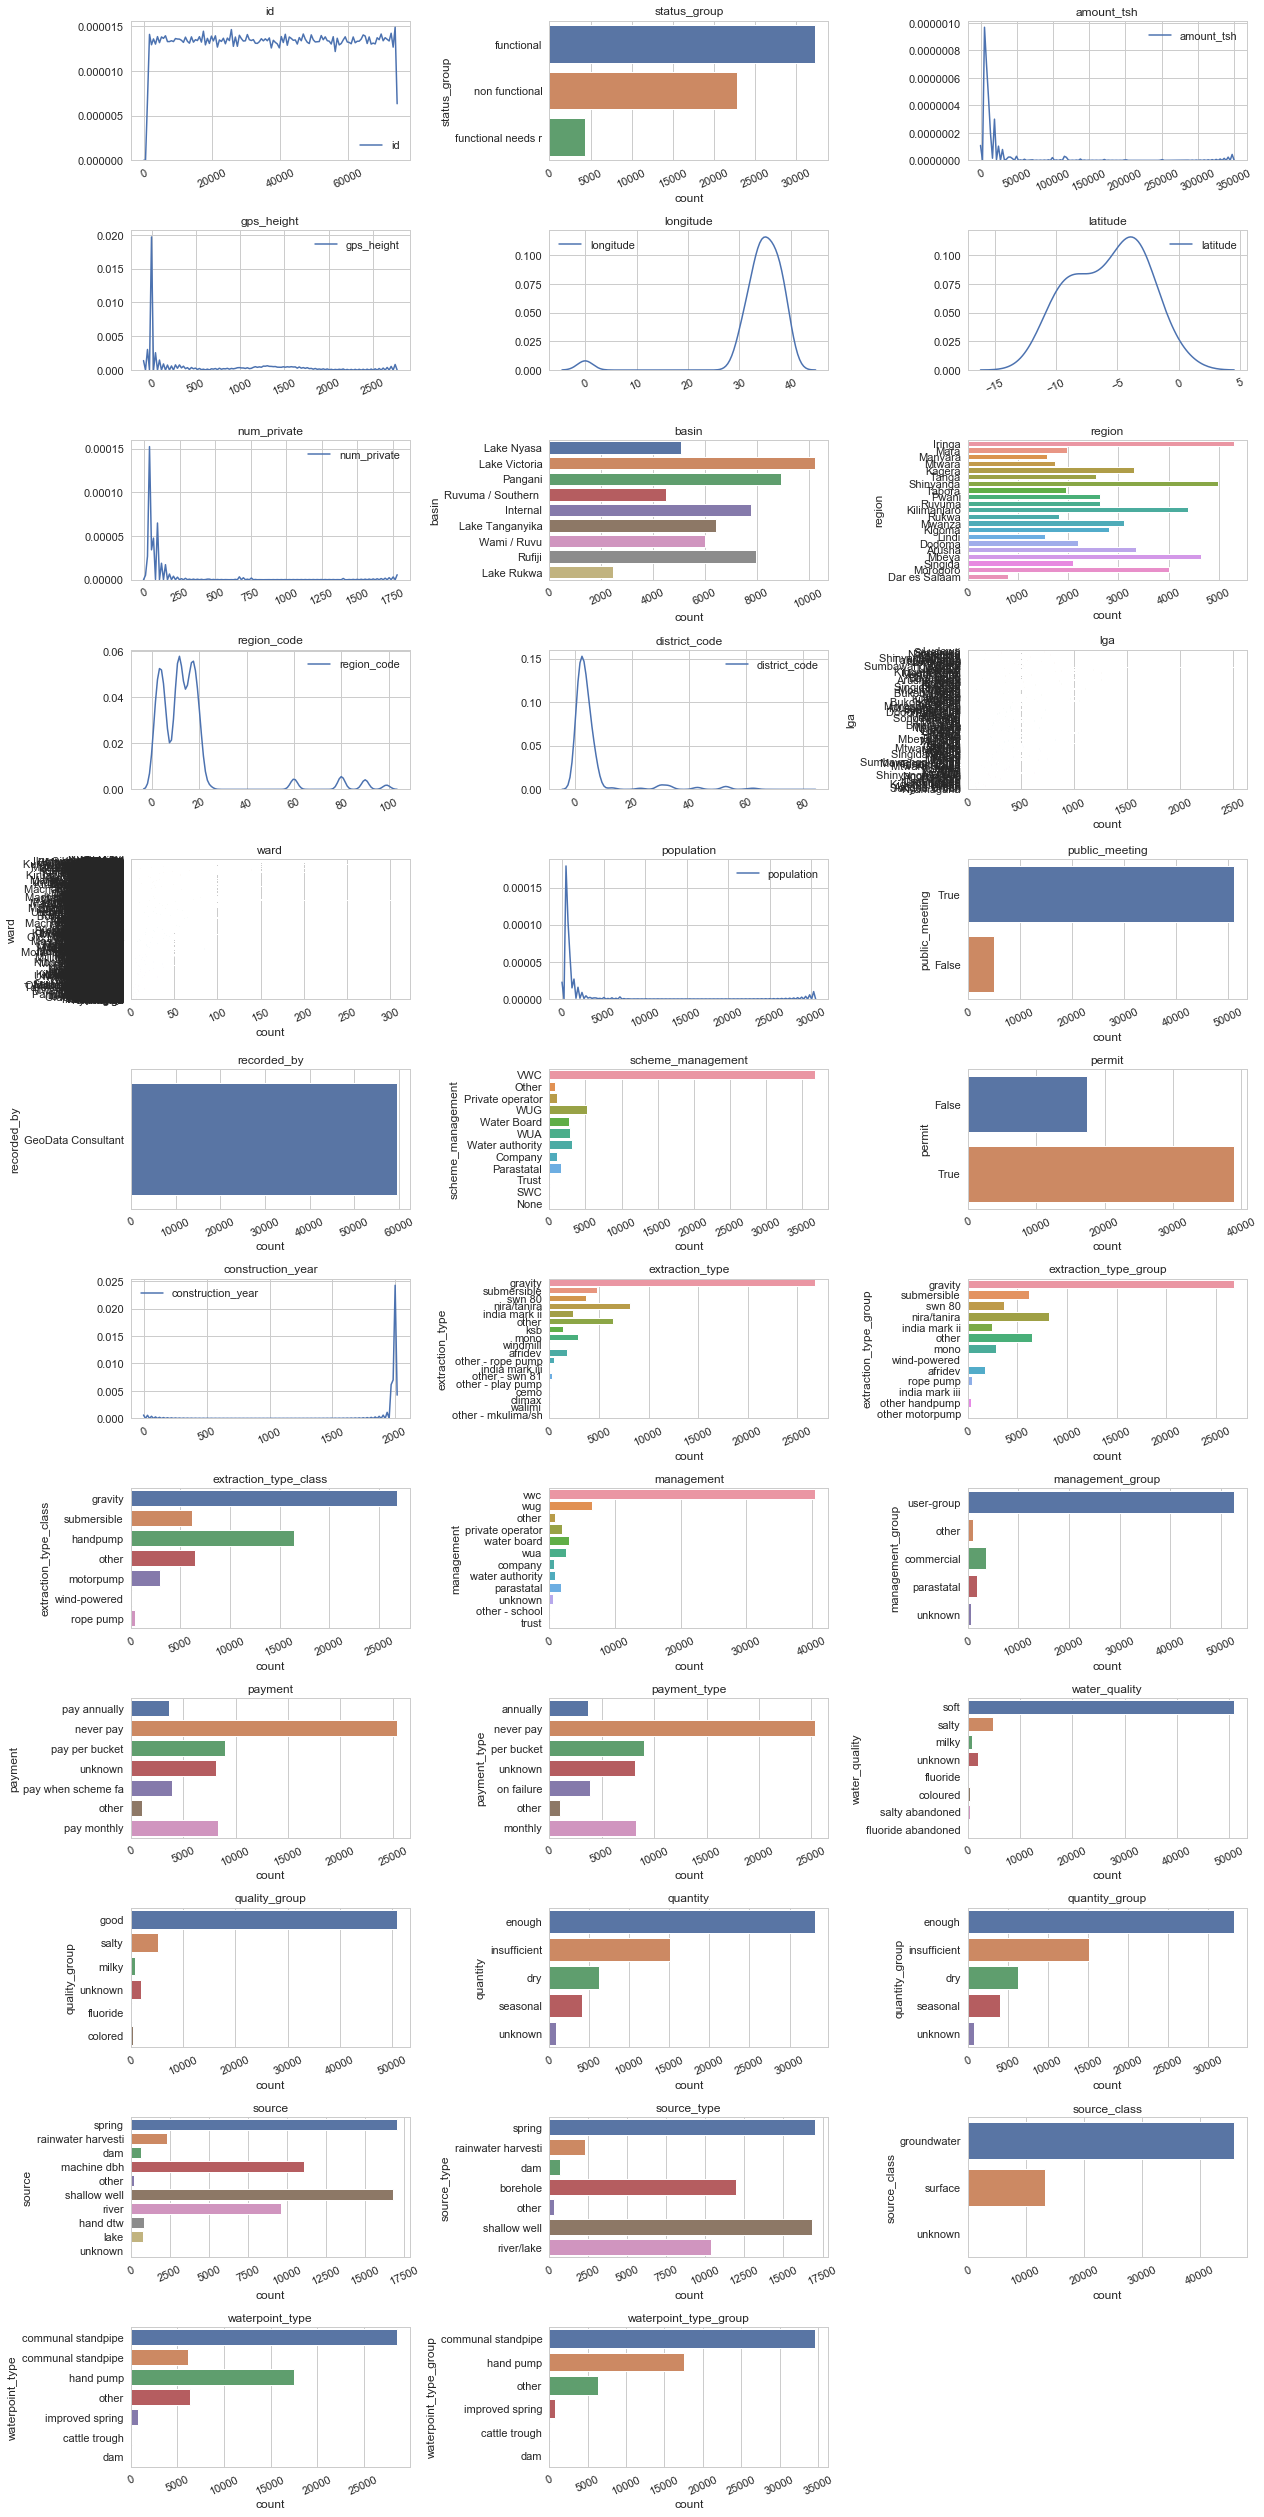

In [24]:
plot_distribution(df_train.drop(labels=['date_recorded','funder','installer','wpt_name','subvillage'
                                 ,'scheme_name'],axis=1),cols=3)

In [ ]:
df_train.waterpoint_type.value_counts()

In [ ]:
cols_to_drop = []

In [ ]:
# waterpoint_type_group and waterpoint_type are nearly the same. 
# Only little difference as communal standpipe is divided in the waterpoint type.
# probably drop one
df_train.waterpoint_type_group.value_counts()

In [ ]:
df_train.groupby(['waterpoint_type_group','waterpoint_type']).recorded_by.value_counts()

In [ ]:
# quantity and quantity group are exactly the same: drop one
(df_train.quantity == df_train.quantity_group).value_counts()

In [ ]:
df_train.payment.value_counts()

In [ ]:
# is exactly the same as pament. just with slightly different naming. Drop one!
df_train.payment_type.value_counts()

In [ ]:
# only one value within the column 'recorded_by'. Drop this as it has no information
df_train.recorded_by.value_counts()

In [ ]:
df_train.funder.value_counts()

In [ ]:
# at least 11 columns with geographic information:
    # gps_height - Altitude of the well
    # installer - Organization that installed the well
    # longitude - GPS coordinate
    # latitude - GPS coordinate
    # basin - Geographic water basin
    # subvillage - Geographic location
    # region - Geographic location
    # region_code - Geographic location (coded)
    # district_code - Geographic location (coded)
    # lga - Geographic location
    # ward - Geographic location

In [ ]:
df_train['gps_height'].replace(0.0, np.nan, inplace=True)
df_train['population'].replace(0.0, np.nan, inplace=True)
df_train['amount_tsh'].replace(0.0, np.nan, inplace=True)
df_train['construction_year'].replace(0.0, np.nan, inplace=True)
df_train['longitude'].replace(0.0, np.nan, inplace=True)
df_train['latitude'].replace(0.0, np.nan, inplace=True)
df_train['wpt_name'].replace('none', np.nan, inplace=True)
df_train.isna().sum().sort_values()

In [ ]:
20709/59400

In [ ]:
df_train.construction_year.value_counts()

In [ ]:
pd.to_datetime(df_train.construction_year, format='%Y')

In [ ]:
df_train.query('construction_year != 0').status_group.value_counts(normalize=True).round(4)*100

In [ ]:
df_train.longitude.value_counts()

In [ ]:
#plt.figure(figsize=(12,12))
df_train.query('longitude != 0').plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,10));

In [ ]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='longitude',y='latitude',alpha=0.4,hue='status_group',data=df_train.query('longitude != 0'))

In [ ]:
df_train.query('longitude==0').status_group.value_counts(normalize=True)

In [ ]:
df_train.region_code.nunique()

In [ ]:
df_train.ward.nunique()

In [ ]:
df_train.subvillage.nunique()

In [ ]:
df_train.query('wpt_name == "none"')['wpt_name'].count()

In [ ]:
sns.boxplot(df_train.amount_tsh)

In [ ]:
df_train.amount_tsh.describe()

In [ ]:
df_train.query('amount_tsh > 0').amount_tsh.describe()

In [ ]:
df_train.query('amount_tsh == 0').status_group.value_counts(normalize=True)

In [ ]:
df_train.quantity.value_counts()

In [ ]:
df_train.query('population==0').population.describe()

In [ ]:
df_train.query('district_code==0').district_code.count()

In [ ]:
sns.distplot(df_train.gps_height)

In [ ]:
df_train.query('gps_height==0').id.count()

In [ ]:
sns.scatterplot(x='longitude',y='latitude',alpha=0.4,
                data=df_train.query('longitude != 0').query('gps_height==0'))

In [ ]:
df_train.lga.nunique()

In [ ]:
df_train.groupby(['region_code','district_code']).recorded_by.value_counts()

In [ ]:
df_train.groupby(['district_code','region_code']).recorded_by.value_counts()

In [ ]:
df_train.district_code.value_counts()

In [ ]:
df_train.region_code.value_counts()

In [ ]:
df_train.nunique().sort_values()